# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [30]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [32]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [33]:
# Create a Beautiful Soup Object
html = browser.html
soup_obj = soup(html, 'html.parser')

In [35]:
# Extract all rows of data
# Find the table element
table = soup_obj.find('table')

# Extract the table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Extract the table rows
rows = []
for tr in table.find_all('tr')[1:]:
    row = [td.text.strip() for td in tr.find_all('td')]
    rows.append(row)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [36]:
# Create an empty list
data_rows = []
# Loop through the scraped data to create a list of rows
for row in rows:
    data_rows.append(row)

In [37]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame using the list of rows and column names
data = pd.DataFrame(data_rows, columns=column_names)


In [38]:
# Confirm DataFrame was created successfully
display(data)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [39]:
# Examine data type of each column
print("Data Types Before Conversion:")
print(data.dtypes)

Data Types Before Conversion:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [40]:
# Change data types for data analysis
data['terrestrial_date'] = pd.to_datetime(data['terrestrial_date'])
data['sol'] = data['sol'].astype(int)
data['ls'] = data['ls'].astype(float)
data['month'] = data['month'].astype(int)
data['min_temp'] = data['min_temp'].astype(float)
data['pressure'] = data['pressure'].astype(float)

In [41]:
# Confirm type changes were successful by examining data types again
print("\nData Types After Conversion:")
print(data.dtypes)


Data Types After Conversion:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [42]:
# 1. How many months are there on Mars?
month_counts = data['month'].value_counts().sort_index()

# Print the count for each month
print("Month Counts (Sorted):")
print(month_counts)

Month Counts (Sorted):
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [43]:
# 2. How many Martian days' worth of data are there?
num_martian_days = data['sol'].nunique()

# Print the number of Martian days
print("Number of Martian Days in the Dataset:", num_martian_days)

Number of Martian Days in the Dataset: 1867


In [44]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = data.groupby('month')['min_temp'].mean()

# Print the average low temperature by month
print("Average Low Temperature by Month:")
print(avg_low_temp_by_month)

Average Low Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


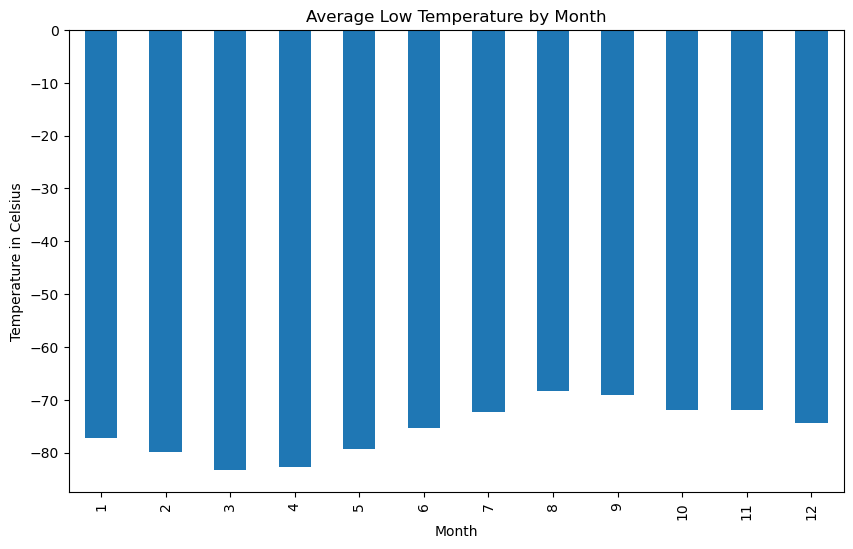

In [45]:
# Plot the average temperature by month
avg_low_temp_by_month.plot(kind='bar', figsize=(10, 6))

# Set the labels for the x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Set the title of the chart
plt.title('Average Low Temperature by Month')

# Show the plot
plt.show()

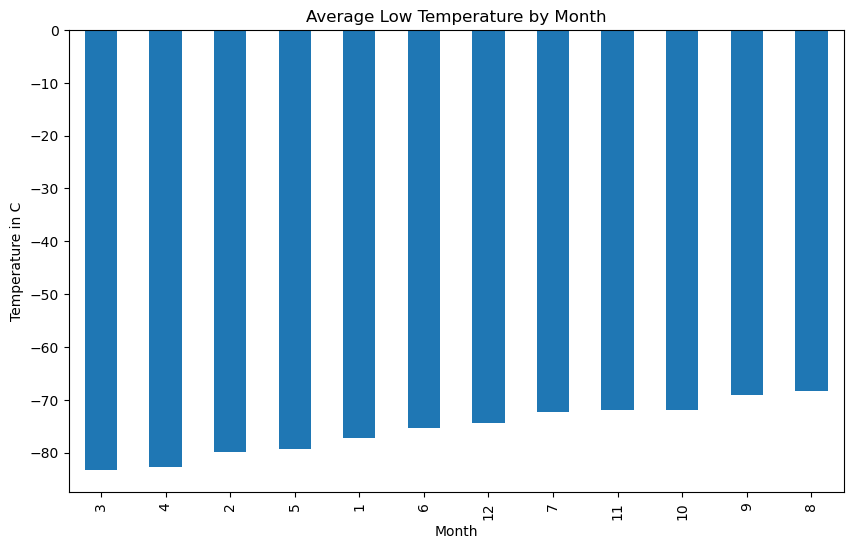

In [46]:
# Identify the coldest and hottest months in Curiosity's location
sorted_avg_low_temp = avg_low_temp_by_month.sort_values()

# Plot the average temperature by month in the sorted order
sorted_avg_low_temp.plot(kind='bar', figsize=(10, 6))

# Set the labels for the x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Temperature in C')

# Set the title of the chart
plt.title('Average Low Temperature by Month')

# Show the plot
plt.show()

In [47]:
# 4. Average pressure by Martian month
avg_pressure_by_month = data.groupby('month')['pressure'].mean()

# Print the average pressure by Martian month
print("Average Pressure by Martian Month:")
print(avg_pressure_by_month)

Average Pressure by Martian Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


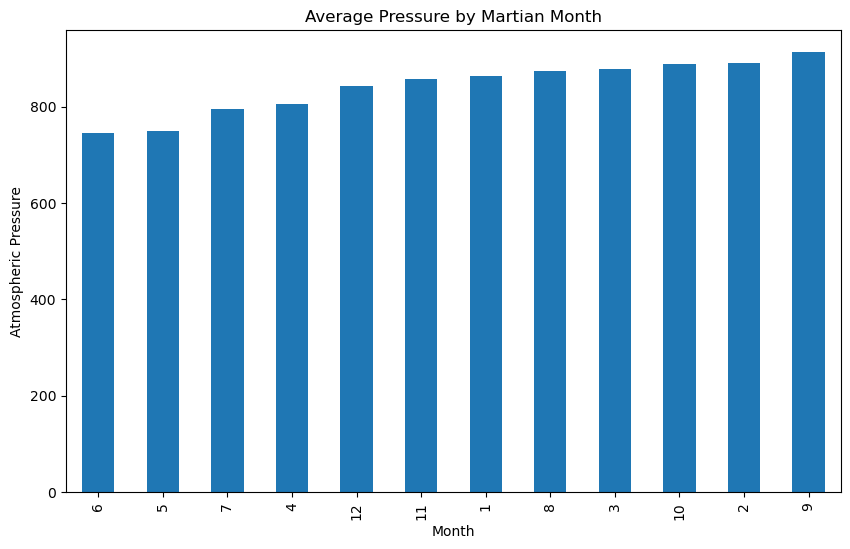

In [48]:
# Plot the average pressure by month
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Plot the average pressure by Martian month in the sorted order
sorted_avg_pressure.plot(kind='bar', figsize=(10, 6))

# Set the labels for the x-axis and y-axis
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Set the title of the chart
plt.title('Average Pressure by Martian Month')

# Show the plot
plt.show()

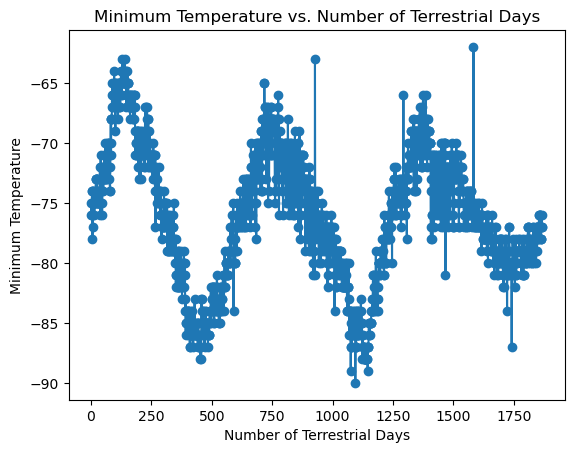

In [49]:
# 5. How many terrestrial (earth) days are there in a Martian year?
terrestrial_days = num_martian_days / 1.027

# Create an array of x-axis values for the same length as the data
x_values = np.linspace(1, len(data), len(data))

# Create a line plot
plt.plot(x_values, data['min_temp'], marker='o', linestyle='-')

# Set the labels for the x-axis and y-axis
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')

# Set the title of the chart
plt.title('Minimum Temperature vs. Number of Terrestrial Days')

# Show the plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [50]:
# Write the data to a CSV
data.to_csv('mars_data.csv', index=False)

In [21]:
browser.quit()